In [86]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [61]:
data=pd.read_csv("D:/ADMIN/Desktop/day27/train-1.csv")
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [55]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [63]:
data=data.drop(["Name","Ticket","Cabin","PassengerId"],axis=1)
data.columns
#Attribute Selection

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [64]:
le=preprocessing.LabelEncoder()
le.fit(data['Sex'])
data["Sex"]=le.transform(data["Sex"])
le.fit(data["Embarked"])
data["Embarked"]=le.transform(data["Embarked"])

In [126]:
#applying KNN Algorithm
from sklearn import neighbors
n=len(data["Pclass"].value_counts())
y = data["Pclass"]
x=data.drop(["Pclass"],axis=1)
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=0)

In [127]:
#storing scores and confusion matrix in N-D array 
scores=[]
confusion_matrices=np.zeros((len(x_test),n,n))

In [105]:
for i in range(1,len(x_test)+1):
    knn=neighbors.KNeighborsClassifier(n_neighbors=i)
    scores.append(knn.fit(x_train,y_train).score(x_test,y_test))
    print("K={b} \n Accuracy score is {a}".format(b=i,a=scores[i-1]))
    y_pred=knn.predict(x_test)
    confusion_matrices[i-1]=confusion_matrix(y_test,y_pred)
    print("Confusion matrix\n",confusion_matrices[i-1])

K=1 
 Accuracy score is 0.8913857677902621
Confusion matrix
 [[ 62.   6.   2.]
 [  3.  37.   9.]
 [  1.   8. 139.]]
K=2 
 Accuracy score is 0.8651685393258427
Confusion matrix
 [[ 67.   2.   1.]
 [  8.  37.   4.]
 [  4.  17. 127.]]
K=3 
 Accuracy score is 0.8651685393258427
Confusion matrix
 [[ 63.   5.   2.]
 [  7.  28.  14.]
 [  3.   5. 140.]]
K=4 
 Accuracy score is 0.8239700374531835
Confusion matrix
 [[ 61.   7.   2.]
 [  8.  30.  11.]
 [  4.  15. 129.]]
K=5 
 Accuracy score is 0.8314606741573034
Confusion matrix
 [[ 58.  10.   2.]
 [  7.  28.  14.]
 [  3.   9. 136.]]
K=6 
 Accuracy score is 0.846441947565543
Confusion matrix
 [[ 64.   5.   1.]
 [  7.  32.  10.]
 [  3.  15. 130.]]
K=7 
 Accuracy score is 0.8426966292134831
Confusion matrix
 [[ 59.  10.   1.]
 [  7.  28.  14.]
 [  3.   7. 138.]]
K=8 
 Accuracy score is 0.850187265917603
Confusion matrix
 [[ 61.   8.   1.]
 [  7.  34.   8.]
 [  3.  13. 132.]]
K=9 
 Accuracy score is 0.846441947565543
Confusion matrix
 [[ 60.   8.   

#INFERENCE:

In [118]:

print("The max accuracy is when k={a} with accuracy level={b} and confusion matrix\n {c}".format(a=(scores.index(max(scores))+1),b=max(scores),c=confusion_matrices[scores.index(max(scores))+1]))


The max accuracy is when k=1 with accuracy level=0.8913857677902621 and confusion matrix
 [[ 67.   2.   1.]
 [  8.  37.   4.]
 [  4.  17. 127.]]


The matrix shows that 231 of 267 records are correctly classified.

In [115]:
result=pd.DataFrame({'k':list(range(1,len(x_test)+1)),"score":scores})
result.head(2)

,k,score
0,1,0.891386
1,2,0.865169


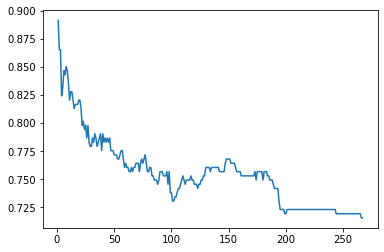

In [116]:
import matplotlib.pyplot as plt
plt.plot(result["k"],result["score"])

This curve shows the accuracy of the model is higher when value of K is lower, with increase in k value the model starts performing badly.
There is inverese relation between K value and accuracy score for the given dataset.